In [1]:
import pandas as pd
import numpy as np

In [2]:
corona = pd.read_csv("../csv/corona.csv")

In [3]:
corona.drop(["Unnamed: 0"], axis="columns", inplace=True)

In [4]:
corona.columns = ["등록일시", "사망자", "확진자", "게시글번호", "기준일", 
"기준시간", "수정일시", "누적의심자", "누적확진률"]

In [5]:
corona.sort_values(["등록일시"], inplace=True)

In [6]:
corona.reset_index(drop=True, inplace=True)

In [ ]:
corona["일일확진자"] = corona["확진자"].diff()
corona["일일사망자"] = corona["사망자"].diff()
corona.head()

In [ ]:
## 결측치를 채우는 함수
## fillna(결측치에 들어갈 값)
corona["일일확진자"] = corona["일일확진자"].fillna(0)
corona.head()

In [ ]:
corona.tail(10)

In [ ]:
##fillna(옵션)
## method 속성 -> ffill, bfill
## fill 채우다 라는 의미, f:front  /  b:back
## ffill -> 전의 값으로 채운다
## bfill -> 후의 값으로 채운다
## 누적의심자 컬럼의 값들을 fillna(method ='bfill')
corona["누적의심자"].fillna(method='bfill')

In [ ]:
corona["누적의심자"].fillna(method="ffill")

In [ ]:
## 누적확진률에 결측치의 값을 누적확진률의 평균을 채운다.
corona["누적확진률"].fillna(corona["누적확진률"].mean())

In [17]:
## filter 기능 
## query()
corona.query("일일확진자 < 0")

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [16]:
## 인덱스 444부터 448까지의 데이터를 출력
## loc[]
corona.loc[444:448,:]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


In [19]:
## lambda 함수 파생변수
## 일반 def 함수 파생변수
## 누적확진률 컬럼에서 누적확진률의 평균보다 높으면 High 낮으면 Low

corona["누적확진률"].fillna(corona["누적확진률"].mean(), inplace=True)

In [ ]:
corona["누적확진률"]

In [ ]:
## lambda 매개변수 : 표현식
corona["H/L"] = corona["누적확진률"].apply(
    lambda x : "High" if (x > corona["누적확진률"].mean()) else "Low"
    )
corona["누적확진률"]

In [ ]:
## apply() 일반 함수
## 함수 생성
## 매개변수 1개 매개변수의 값이 누적확진률의 평균보다 높으면 High return 
## 조건식이 거짓이면 Low return

def HL(x):
    if x > corona["누적확진률"].mean():
        return "High"
    else : 
        return "Low"

corona["누적확진률"].apply(HL)

In [33]:
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High


In [32]:
## 요일이라는 파생변수 생성
## 등록일시 datetime 변경
## datetime 기준으로 요일을 출력
corona["등록일시"] = pd.to_datetime(corona["등록일시"])

In [ ]:
## dt.weekday를 사용하면 요일이 숫자로 표시
## 0 -> 월, ... ,6->일
corona["요일"] = corona["등록일시"].dt.weekday
corona.head()

In [36]:
## apply 함수를 이용해서 숫자로 표시되어있는 요일 컬럼을 
## 한글로 변경
def change_week(x):
    if x == 0:
        return "월"
    elif x == 1:
        return "화"
    elif x == 2:
        return "수"
    elif x == 3:
        return "목"
    elif x == 4:
        return "금"
    elif x == 5:
        return "토"
    else :
        return "일"

corona["요일"] = corona["요일"].apply(change_week)

In [ ]:
corona.head()

In [ ]:
corona["요일"].apply(lambda x : "월" if x == 0 else "화" if x == 1 else "수".... )

In [43]:
## 요일별 코로나의 확진자수의 평균이 어떻게 표시가 되는가 
## 그래프를 이용해서 출력
week_corona = corona.groupby("요일").mean()
week_corona

,사망자,확진자,게시글번호,기준일,누적의심자,누적확진률,일일확진자,일일사망자
요일,,,,,,,,
금,5695.976562,3.408271e+06,512.148438,2.020995e+07,7.541537e+06,1.553018,26209.500000,33.117188
목,5850.859375,3.524166e+06,517.304688,2.021003e+07,7.576033e+06,1.555348,29540.468750,33.968750
수,5935.269231,3.619765e+06,516.861538,2.021004e+07,7.472065e+06,1.557891,31891.253846,28.161538
월,5956.882812,3.615912e+06,518.375000,2.021010e+07,7.594898e+06,1.554973,16254.093750,24.289062
일,5871.446154,3.546434e+06,517.061538,2.021011e+07,7.618305e+06,1.552671,23721.653846,28.246154
토,5873.310078,3.548932e+06,516.201550,2.021010e+07,7.575484e+06,1.551502,25993.875969,32.937984
화,5907.107692,3.587874e+06,515.623077,2.021004e+07,7.437156e+06,1.569510,26457.515385,26.604651


In [41]:
from matplotlib import font_manager, rc

In [42]:
import matplotlib.pyplot as plt

In [46]:
week_corona["일일확진자"].to_list()

[26209.5,
 29540.46875,
 31891.253846153846,
 16254.09375,
 23721.653846153848,
 25993.875968992248,
 26457.515384615384]

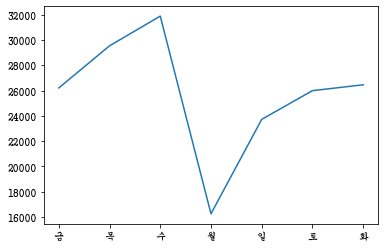

In [50]:
## x축의 값은 -> 요일
## y축의 값은 -> 평균 확진자의 수
x = week_corona.index
y = week_corona["일일확진자"].to_list()

file_path = "C:/Windows/Fonts/HYGSRB.TTF"
font = font_manager.FontProperties(fname = file_path).get_name()

rc('font', family=font)

plt.plot(x, y)
plt.show()